In [1]:

from typing import List
import mhn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.cluster
import RandomMHNGenerator as rmg
import ClusterableMhnGenerator as cmg
import EventDistanceMeasurer as edm
import mhn_tools


#sampled_data=cl_generator.getMHN().sample_artificial_data(100000, as_dataframe=True)

/home/mbonart/ws24_mbonart_mhn-feature-clustering/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.loadfrom("mbonart_checkpoints/rmg1")
cl_generator.setClusterMHN(rand_generator.getMHN())
cl_generator.splitClusters([2,3,4,1,4])
cl_generator.randomizeBaseRates()   #leave out this line for already computed results

test_events = cl_generator.getEvents(cmg.DOM.TEST)
events = cl_generator.getEvents(cmg.DOM.CLUSTER)

sampled_datas:List[pd.DataFrame]=[]

dist_measurers = []
noisy_mhns: List[mhn.model.cMHN]=[]

noise_steps=10
noise_inc=0.1
#noise_inc=0.01      #leave out this line for already computed results

for i in range(noise_steps):
    noisy_mhn = mhn_tools.copyMHN(cl_generator.getMHN())
    sampled_data=noisy_mhn.sample_artificial_data(100000, as_dataframe=True)
    noisy_mhns.append(noisy_mhn)
    sampled_datas.append(sampled_data)
    #cl_generator.addNoiseOffDiags(noise_inc)
    cl_generator.multNoiseOffDiags(noise_inc)
    

#for noisy_mhn in noisy_mhns:
#    noisy_mhn.plot()






loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


In [ ]:
for i, sampled_data in enumerate(sampled_datas):
    
    dist_measurer=edm.EventDistanceMeasurerCP(test_events, events)

    dist_measurer.load_data(sampled_data)
    dist_measurer.train_All_MHNs(identifier=f"multnoise_no-CV_{i*noise_inc}__", do_cv=False)
    dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_EUCLID)

    dist_measurers.append(dist_measurer)

0x1.0b4eb6c2f915ap+63
Directory for storage is edm_multnoise_no-SE_0.0__0b4eb6c2f915a
check if mbonart_checkpoints/edm_multnoise_no-SE_0.0__0b4eb6c2f915a   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x7fe3482732e0>
0x1.616912622a7ebp+60
Directory for storage is edm_multnoise_no-SE_0.1__616912622a7eb
check if mbonart_checkpoints/edm_multnoise_no-SE_0.1__616912622a7eb   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x7fe3482732e0>
0x1.617a39343b6a1p+63
Directory for storage is edm_multnoise_no-SE_0.2__617a39343b6a1
check if mbonart_checkpoints/edm_multnoise_no-SE_0.2__617a39343b6a1   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x7fe3482732e0>
0x1.ce6c0920aa5afp+62
Directory for storage is edm_multnoise_no-SE_0.30000000000000004__ce6c0920aa5af
check if mbonart_checkpoints/edm_multnoise_no-SE_0.30000000000000004__ce6

Noise 0.0:


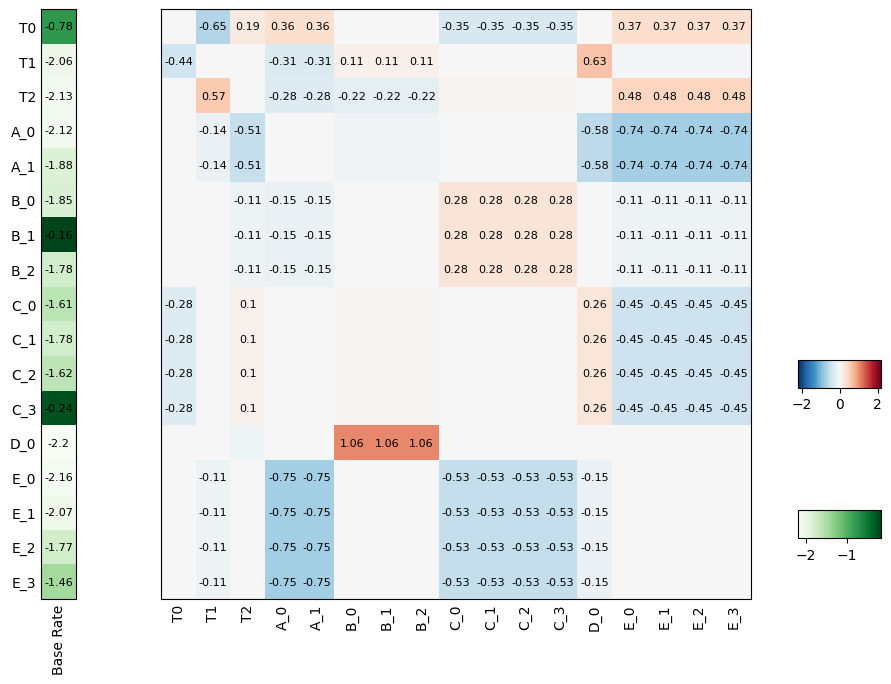

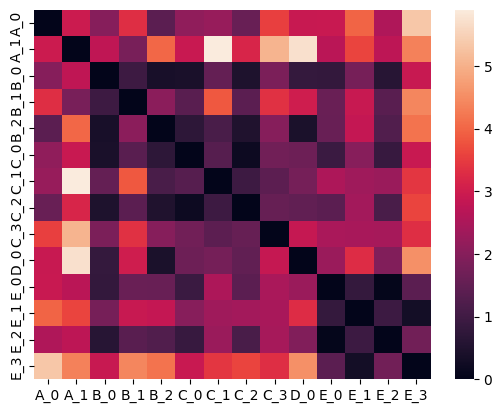

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


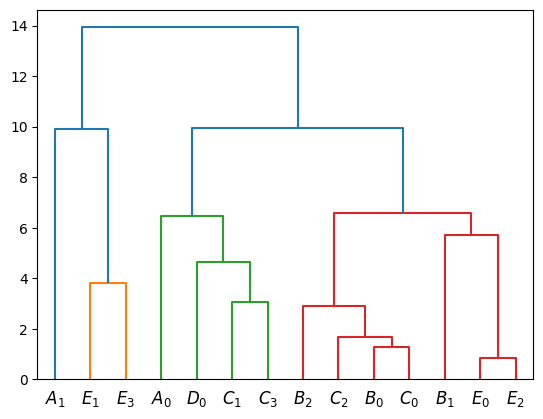

Noise 0.1:


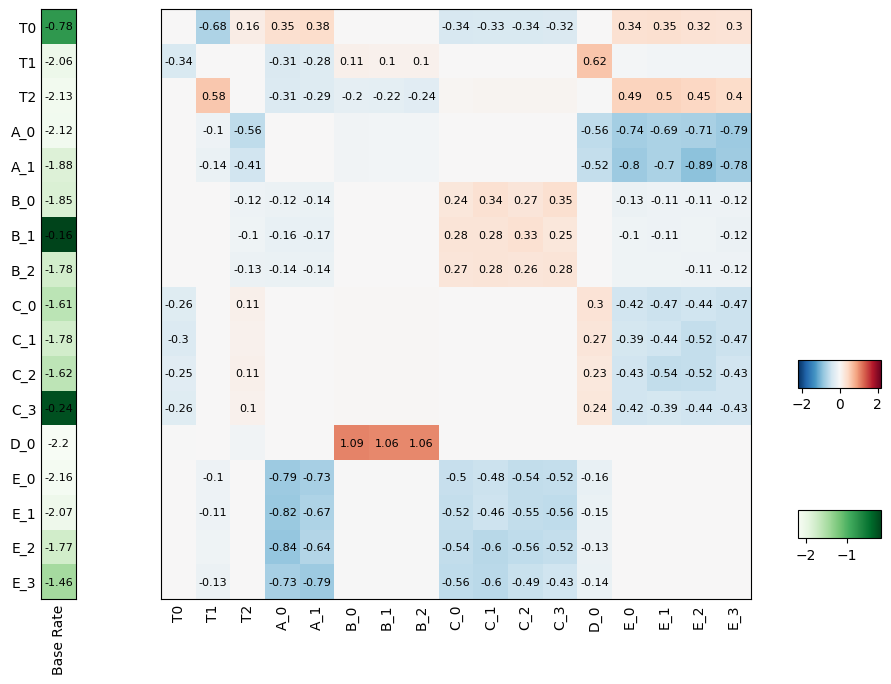

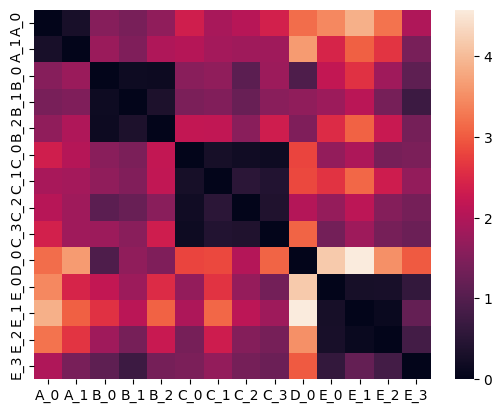

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


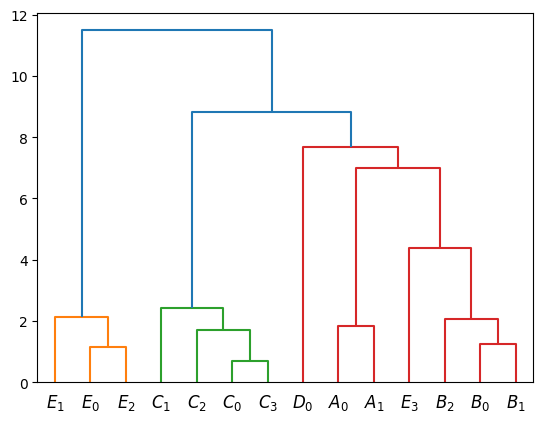

Noise 0.2:


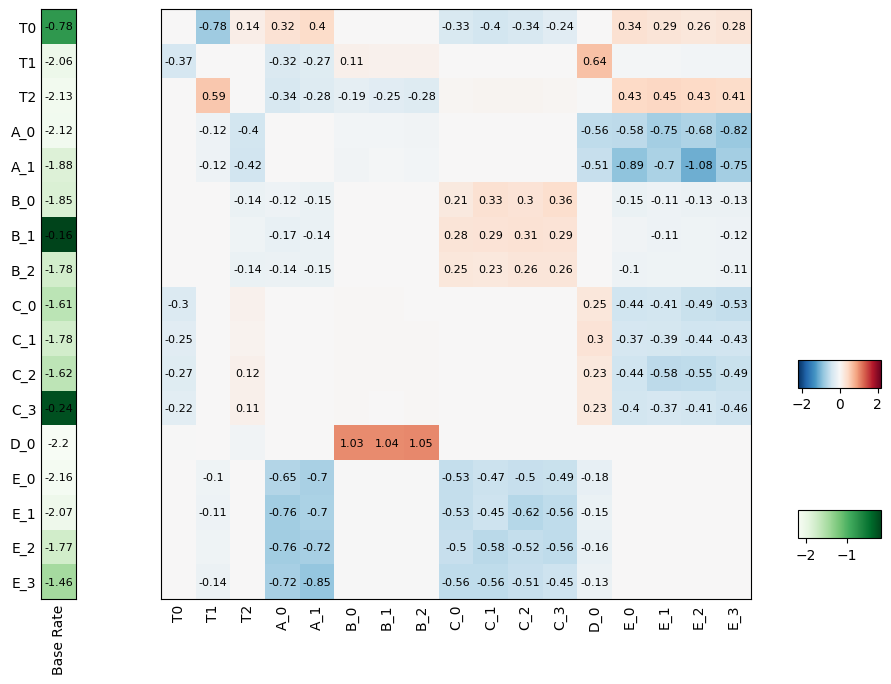

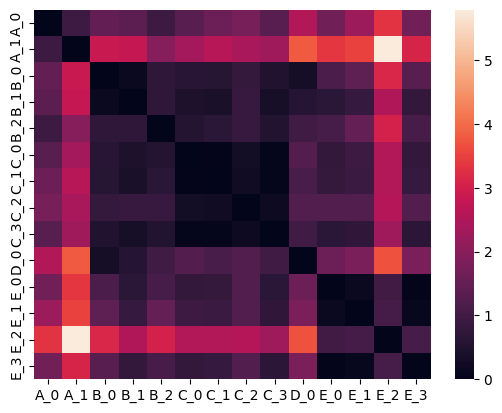

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


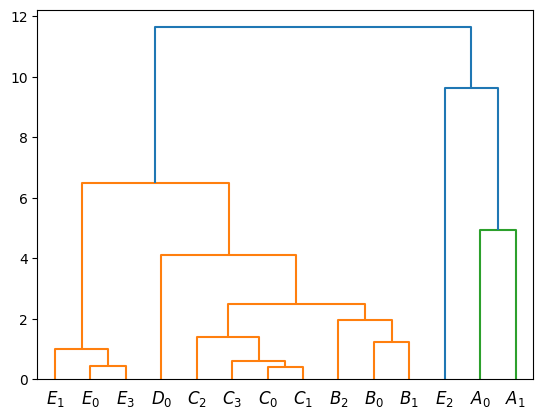

Noise 0.30000000000000004:


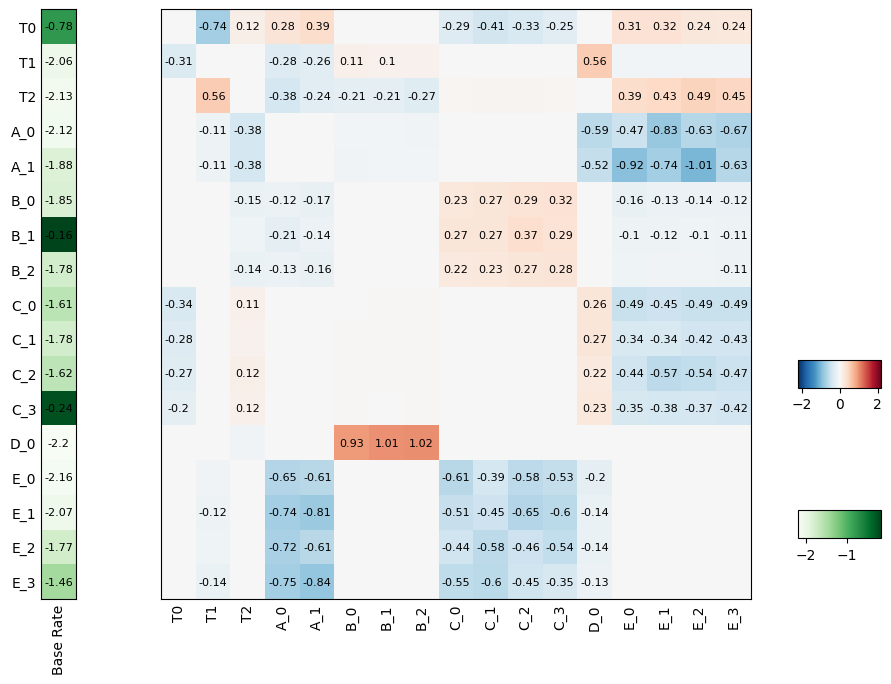

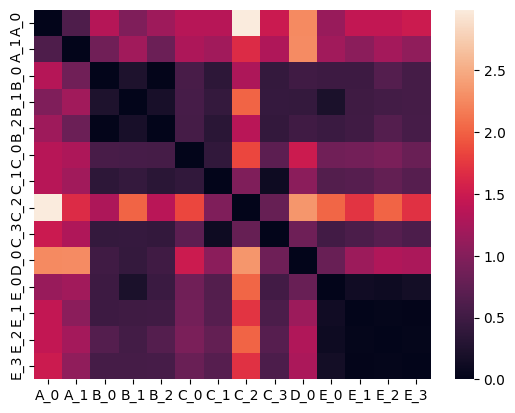

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


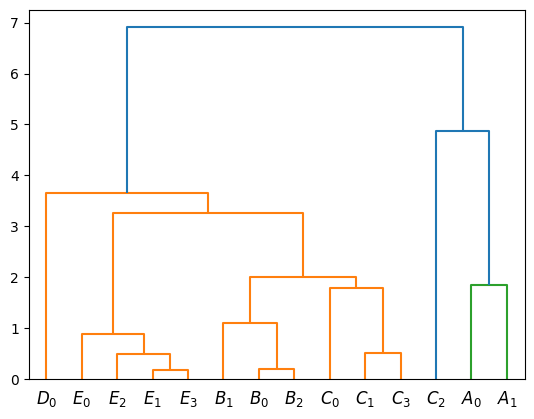

Noise 0.4:


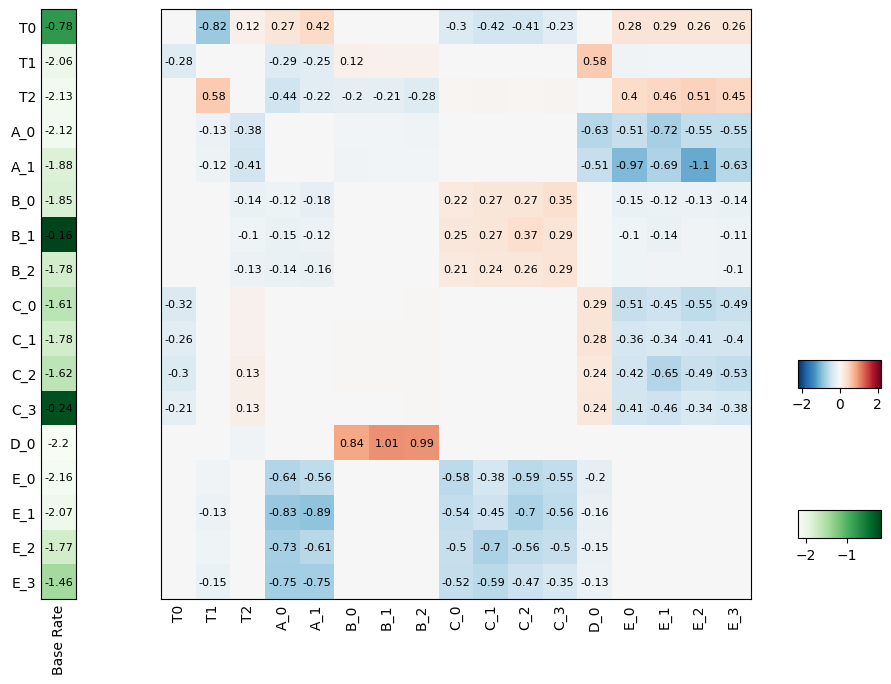

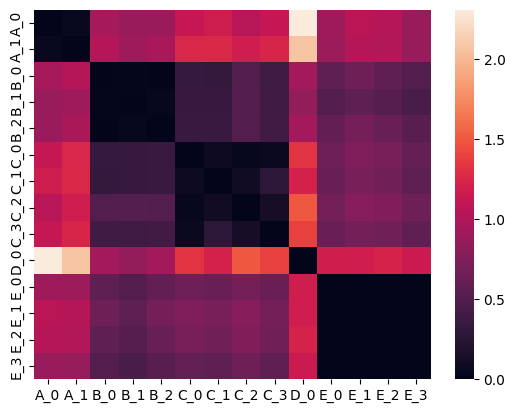

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


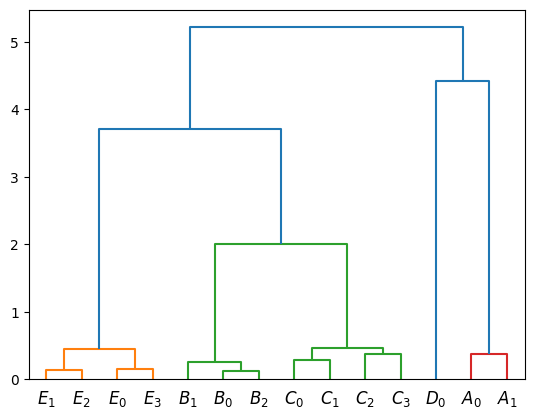

Noise 0.5:


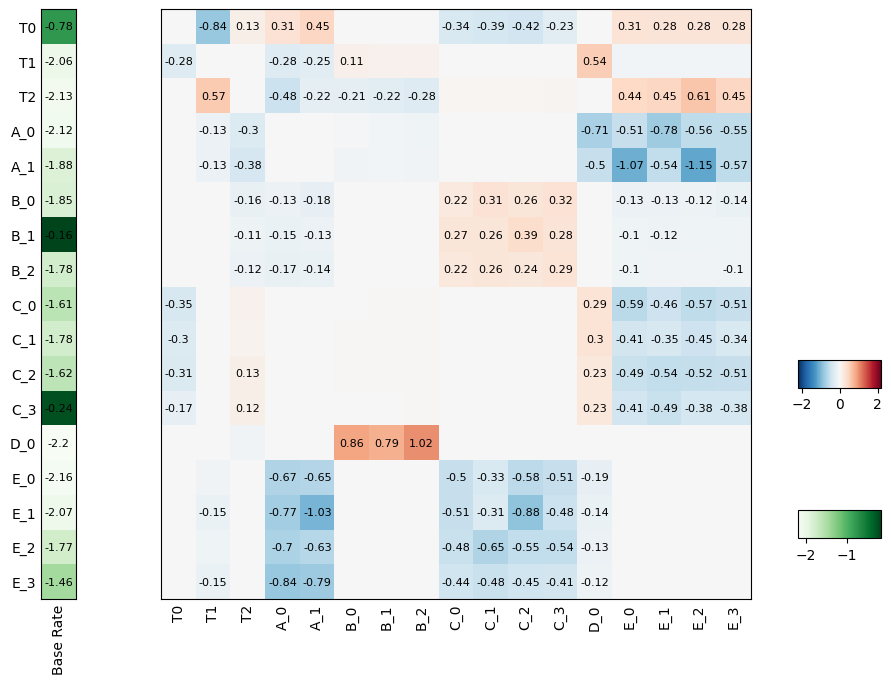

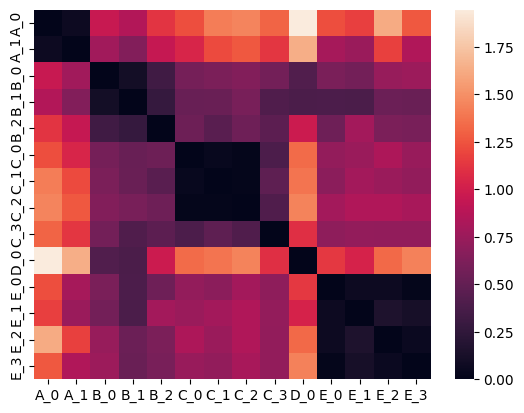

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


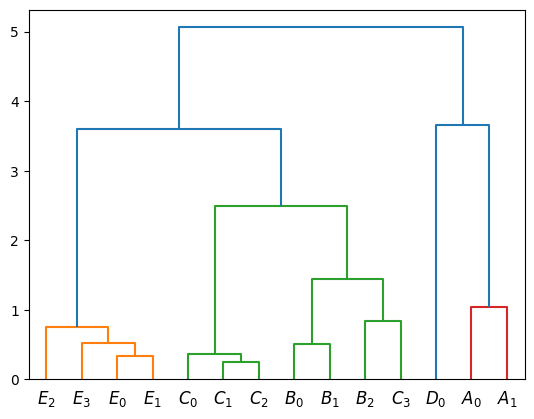

Noise 0.6000000000000001:


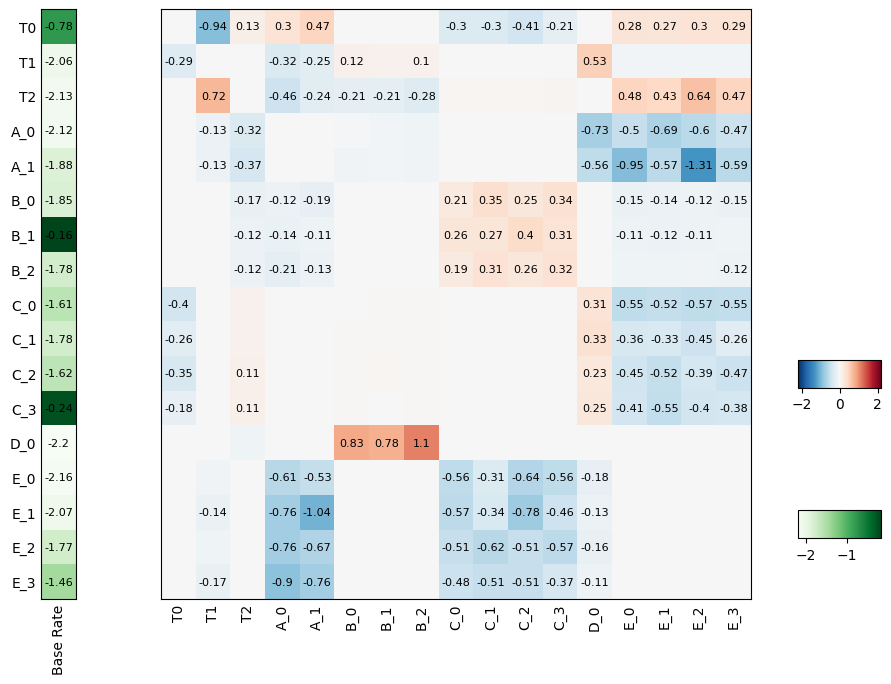

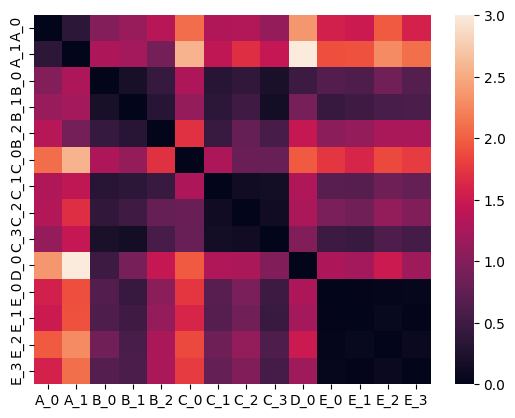

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


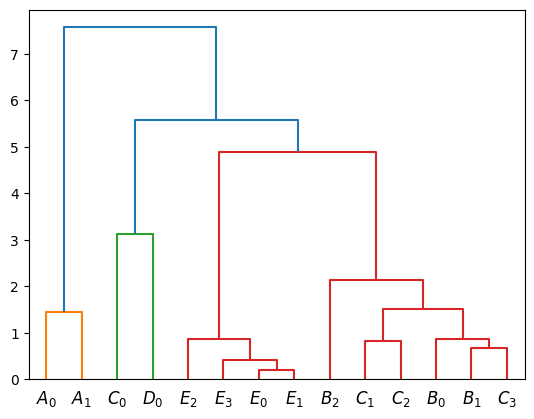

Noise 0.7000000000000001:


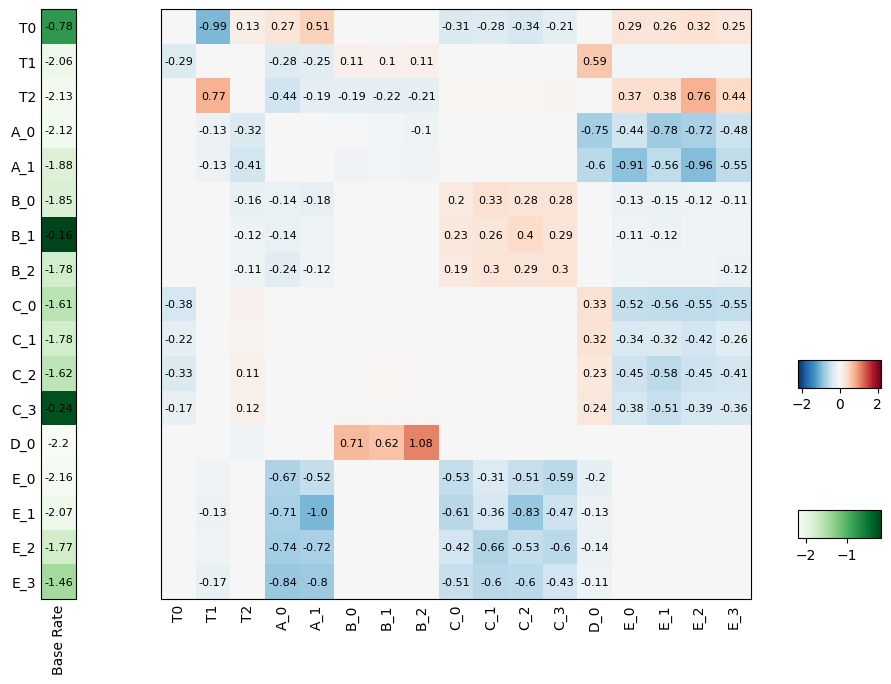

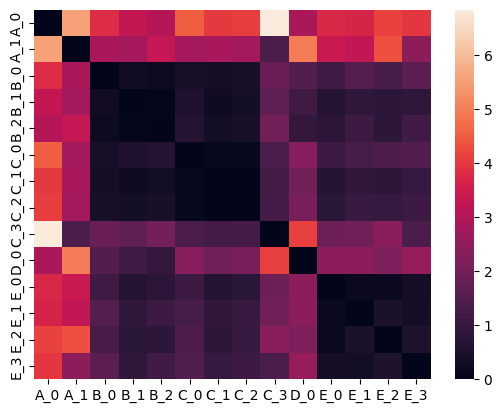

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


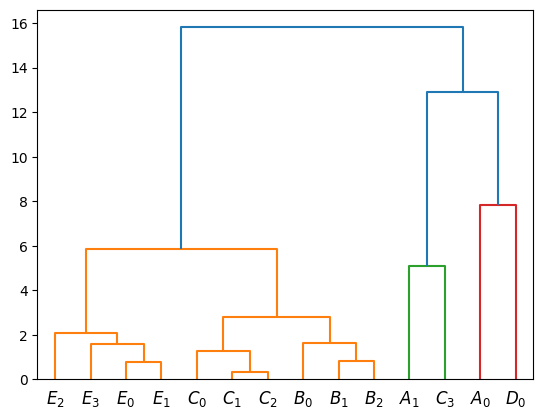

Noise 0.8:


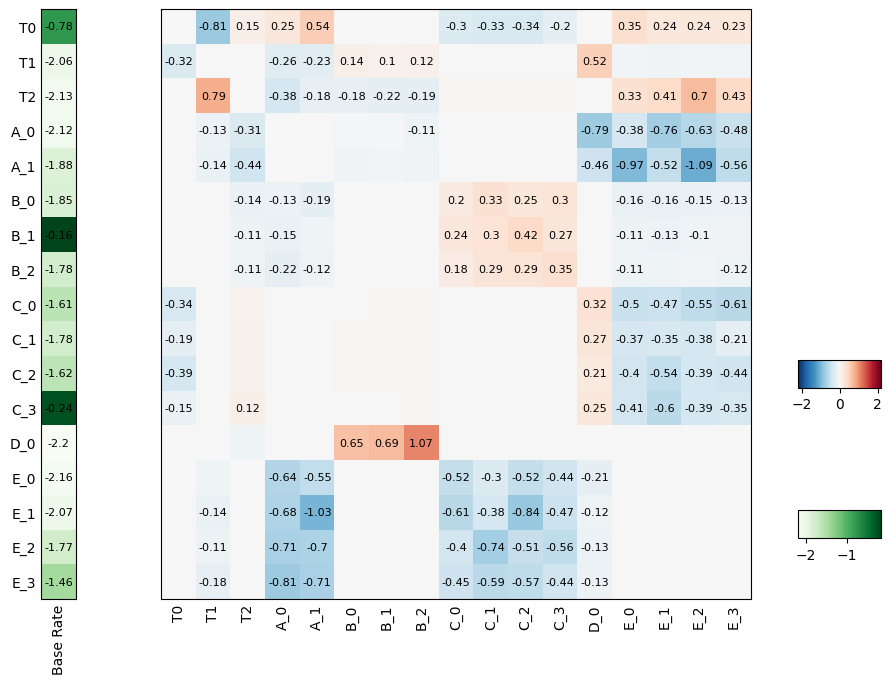

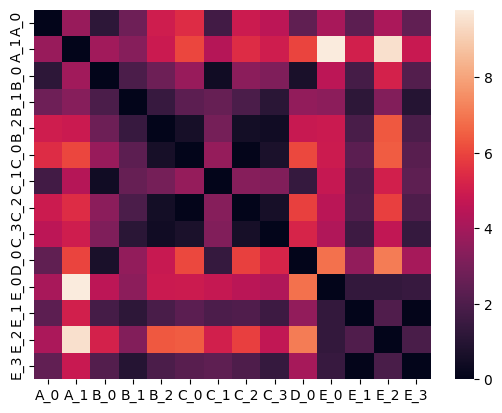

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


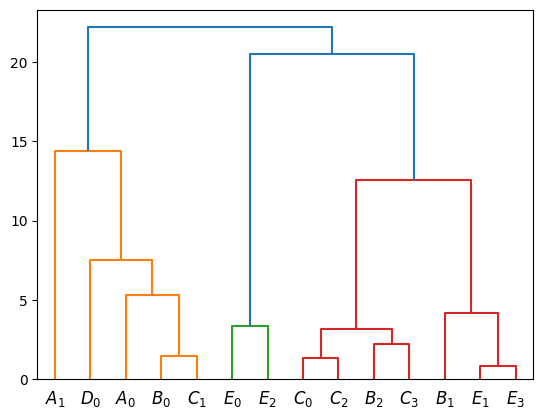

Noise 0.9:


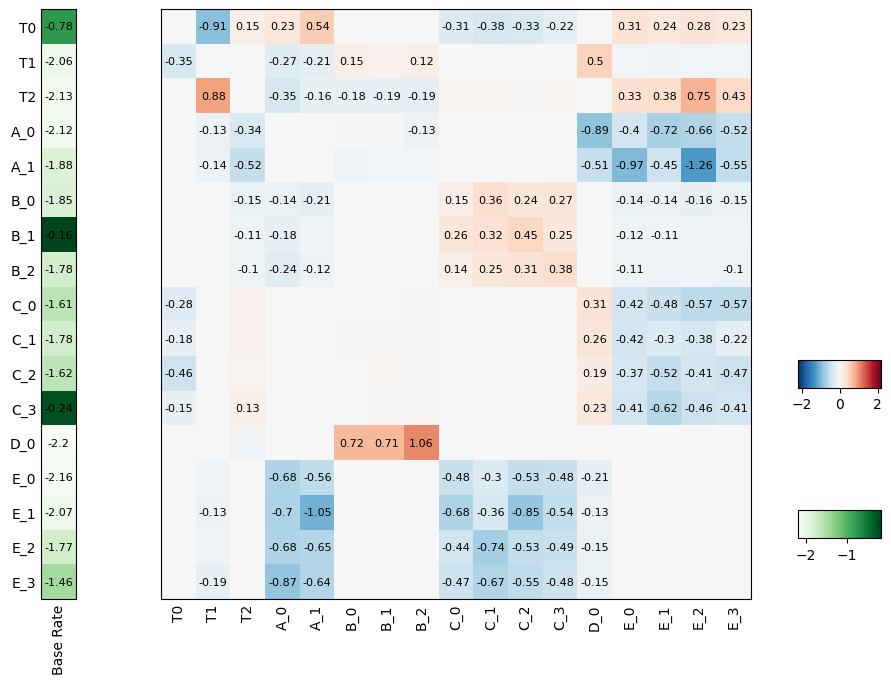

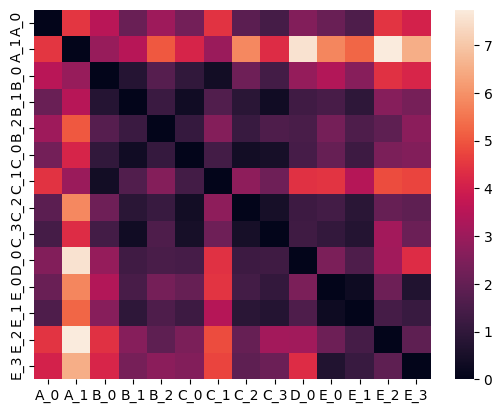

/tmp/ipykernel_3712272/2179658991.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")


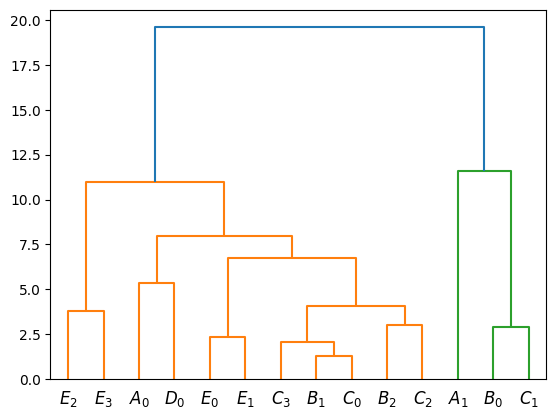

In [4]:
#look at clusters

for i,dist_measurer in enumerate(dist_measurers):
    print(f"Noise {i*noise_inc}:")
    noisy_mhns[i].plot()
    plt.show()
    sns.heatmap(dist_measurer._dist_mat)
    plt.show()
    linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat, method="ward")
    scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])
    plt.show()

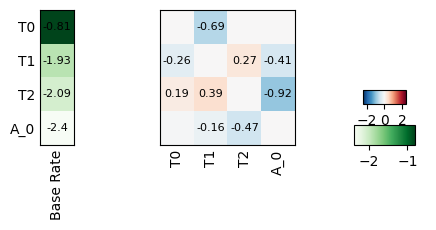

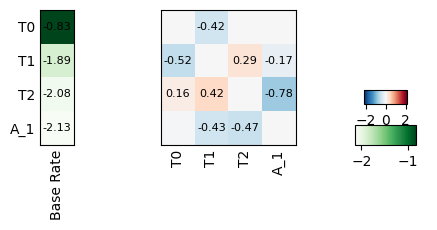

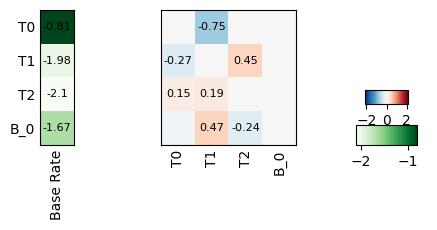

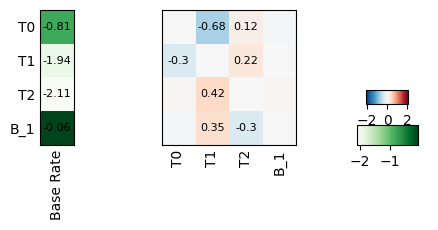

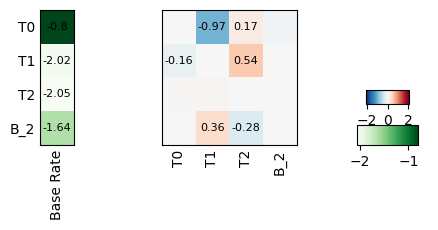

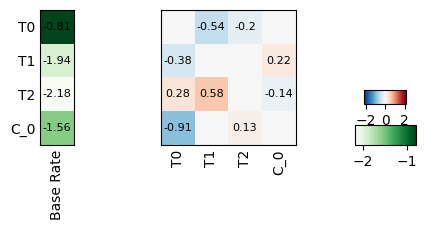

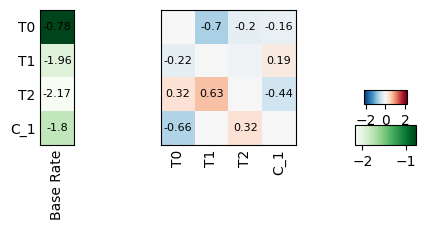

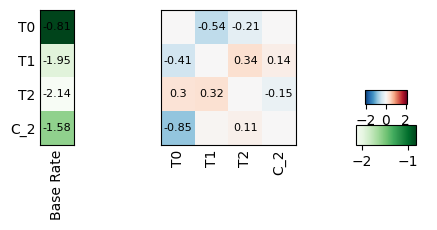

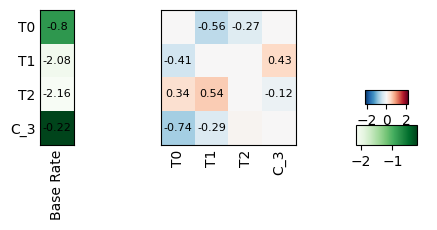

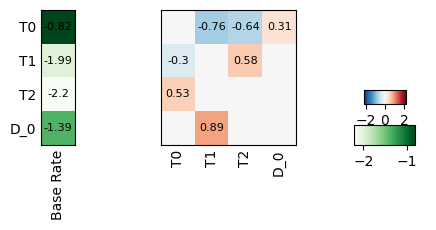

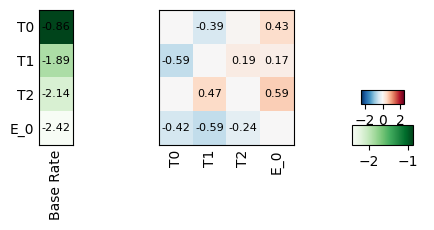

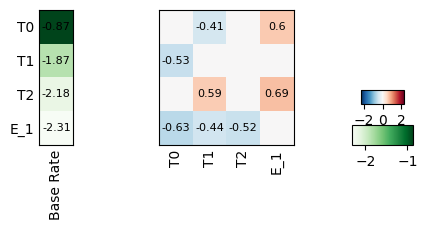

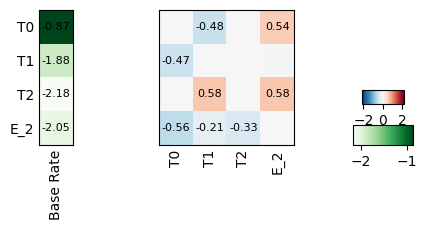

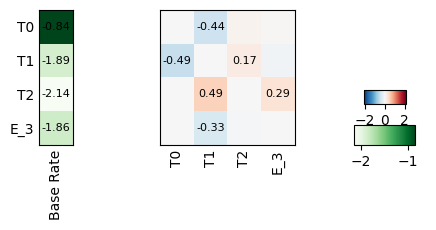

In [6]:
#print(dist_measurers[1]._lam_test)

for ev in dist_measurers[1]._events:
    dist_measurers[1]._mhns[ev].plot()